In [ ]:
%pip install pandas konlpy wordcloud nltk seaborn koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_excel('NewsResult_20250814-20250821.xlsx')
df

/home/an0jin/.local/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100751e+06,20250821,아시아투데이,NaN,"현대제철 순천공장, 초 중 고학년 다문화가정 자녀 '교재구입비' 지원",지역>경기,지역>대전,지역>충북,NaN,NaN,NaN,NaN,"순천공장,순천시가족센터","순천대학교,현대제철,순천공장,아시아투데이","현대,제철,순천,공장,학년,교재구입비,다문화,가정,자녀,교재,구입비,지원,아시아투데...","다문화,다문화가정,교재구입,관계자,후원금,순천대학교,다문화가족,현대,나현범,아시아투...",아시아투데이 나현범 기자 = 현대제철 순천공장은 지난 20일 순천대학교 평생교육원에...,https://www.asiatoday.co.kr/view.php?key=20250...,NaN
1,1.200101e+06,20250821,경기일보,임진흥,의왕시일자리센터 소형지게차 면허 취득과정 교육생 모집,경제>취업_창업,지역>경기,지역>울산,NaN,NaN,NaN,NaN,"수원,의왕,의왕시,의왕시일자리센터","의왕시청,기업일,중장비전문학원,의왕시일자리센터","의왕시,일자리,센터,소형,지게차,면허,취득,교육,모집,의왕시청,전경,의왕시,제공,의...","의왕시,일자리,구직자,가입자,의왕,소지자,수원,홈페이지,의왕시일자리센터,신청서,사항...",의왕시청 전경. 의왕시 제공 \n 의왕시일자리센터는 취업프로그램 소형지게차 면허 취...,https://www.kyeonggi.com/article/20250821580088,NaN
2,1.200101e+06,20250821,경기일보,김동수,하남시 원도심 어린이 놀이터 전면 리모델링 “맞춤형 놀이터로”,지역>경기,지역>전북,지역>강원,NaN,NaN,NaN,NaN,"신장동,창우동,린이공원,원도심,새나라어린이공원,어린이공원,하남,덕풍동,하남시",시민참여혁신위원회 도시개발분,"하남시,원도심,어린이,놀이터,전면,리모델링,맞춤,놀이터,전면,리모델링,5곳,하남시,...","놀이터,창우동,하남시,덕풍동,2번지,원도심,네트놀이시설,학부모,어린이들,탈바꿈,새나...",전면 리모델링 중인 하남시 어린이공원 5곳. 하남시 제공 \n 하남 원도심 내 창우...,https://www.kyeonggi.com/article/20250821580086,NaN
3,1.200101e+06,20250821,경기일보,김종구,부천시 청소년의 문화예술 향유기회 확대 창의력 감수성 키운다,문화>전시_공연,문화>음악,문화>미술_건축,NaN,NaN,NaN,"조용익,국제만화축,정부,아드리앙 페뤼숑,우하은,이재명","부천시,부천아트밸리,장르,부천","부천시,부명초등학교,복사골청소년예술제,부천아트센터,웹툰작가,복사골문화센터,부천,한국...","부천시,청소년,확대,문화,예술,향유기회,창의력,감수성,부천아트센터,지난달,부천필,오...","오픈리허설,부천,웹툰,작업실,지휘자,공연장,아드리앙,부천시,문화강국,임덕영,향유기회...",지난달 24일 부천아트센터에서 열린 부천필 오픈리허설에서 아드리앙 페뤼숑 선임 지휘...,https://www.kyeonggi.com/article/20250821580078,NaN
4,1.300201e+06,20250821,강원일보,백진용기자 bjy@kwnews.co.kr,"횡성군자원봉센터, 9개 읍 면 저소득층 노후보일러 교체 사업 완료",지역>경기,지역>대전,지역>충남,NaN,NaN,NaN,NaN,"횡성군자원봉센터,횡성지역,횡성군자원봉사센터,강원만,둔내면","강원랜드,자원봉사협의회,자원","횡성군자원봉센터,9개,소득,노후보일러,교체,사업,횡성,횡성군자원봉사센터,센터장,한재...","9개,노후보일러,센터장,횡성,둔내면,저소득층,자원봉사자들,행복횡,행복횡성,희망횡,지...",【횡성】횡성군자원봉사센터(센터장:한재수)가 9개 읍 면 저소득층의 노후보일러 교체사...,https://www.kwnews.co.kr/page/view/20250821090...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.601001e+06,20250820,전북도민일보,정읍=하경민 기자,"정읍학생복지회관, 하반기 방과후 수영 교육프로그램 운영",사회>교육_시험,지역>충북,지역>대전,NaN,NaN,NaN,김명자,"정읍,정읍학생복지회관",NaN,"정읍학생복지회관,방과후,수영,교육,프로그램,운영,정읍학생복지회관,관장,김명자,관내,...","방과후,정읍학생복지회관,김명자,그림책,talk,누리집,정읍,공예놀이터,학생들,중학생...",정읍학생복지회관(관장 김명자)은 관내 초ㆍ중학생을 대상으로 하반기 방과후교육과 수...,http://www.domin.co.kr/news/articleView.html?i...,NaN
19996,1.601001e+06,20250820,전북도민일보,고창=임용묵 기자,"풍년 기원 전통 ‘꽃대림굿’, 고창서 축제로 되살아난다",문화>전시_공연,문화>요리_여행,지역>강원,NaN,NaN,NaN,NaN,"고창,양주별산","고창농악보존회,대림축제,보존회,꽃대림축제,고창농악보존회장,고창군농악단연합회,대동","풍년,기원,전통,꽃대림굿,고창서,축제,고창농악보존회,주관,꽃대림축제,고창농악,꽃대림...","꽃대림굿,꽃대림축제,서커,양주별산대놀이,구재연,대동,고창농악전수관,보존회,주년,40...",고창농악보존회가 주관하는 ‘제6회 고창농악 꽃대림축제’ 오는 29일부터 31일까지...,http://www.domin.co.kr/news/articleView.html?i...,NaN
19997,1.601001e+06,20250820,전북도민일보,고창=임용묵 기자,고창군 규제개혁 아이디어 공모전 우수 제안 선정,지역>전북,지역>충북,지역>대전,NaN,NaN,NaN,김영식,"임야,고창군,최한,자양","고창군,2025 규제개혁 아이디어 공모전","선정,고창군,규제,개혁,아이디어,공모전,우수,제안,고창군,20일,규제,개혁,아이디어...","공모전,고창군,공무원,농업인,오현미,사각지대,김남곤,김진수,우수상,군민과,자양분,절...",고창군이 20일 ‘2025 규제개혁 아이디어 공모전’을 통해 군민과 공무원의 창의적...,http://www.domin.co.kr/news/articleView.html?i...,NaN
19998,1.601001e+06,20250820,전북도민일보,진안=김성봉 기자,진안군 인구 전월대비 21명 증가 지방소멸대응기금 성과 뚜렷,지역>충남,지역>충북,지역>전북,NaN,NaN,NaN,전춘성,"성수면,진안군,행복주택,진안군수 진안군,부귀면,백운면,진안,정주","진안군,SOC,부귀면,백운면","증가,진안군,인구,전월,대비,지방소멸대응기금,진안군,전춘성,진안,군수,진안,군수,전...","농촌유학,진안군,백운면,진안,행복주택,전춘성,인구증가,정주여건,지방소멸대응기금,거주...","전춘성 진안군수 진안군(군수 전춘성)은 14일 기준 인구가 총 24,192명으로 집...",http://www.domin.co.kr/news/articleView.html?i...,NaN


In [5]:
# 비어있지 않는 칼럼 수 구하기
df_not_null_count = df.notnull().sum()
df_not_null_count = df_not_null_count[df_not_null_count != 0]
df_not_null_count

뉴스 식별자               20000
일자                   20000
언론사                  20000
기고자                  19195
제목                   20000
통합 분류1               20000
통합 분류2               17395
통합 분류3               14594
사건/사고 분류1             2575
사건/사고 분류2              506
사건/사고 분류3              120
인물                   12646
위치                   17973
기관                   19463
키워드                  20000
특성추출(가중치순 상위 50개)    20000
본문                   20000
URL                  18472
분석제외 여부               1482
dtype: int64

         뉴스 식별자        일자     언론사                     기고자  \
0  1.100751e+06  20250821  아시아투데이                     NaN   
1  1.200101e+06  20250821    경기일보                     임진흥   
2  1.200101e+06  20250821    경기일보                     김동수   
3  1.200101e+06  20250821    경기일보                     김종구   
4  1.300201e+06  20250821    강원일보  백진용기자 bjy@kwnews.co.kr   

                                       제목    통합 분류1  통합 분류2     통합 분류3  \
0  현대제철 순천공장, 초 중 고학년 다문화가정 자녀 '교재구입비' 지원     지역>경기   지역>대전      지역>충북   
1           의왕시일자리센터 소형지게차 면허 취득과정 교육생 모집  경제>취업_창업   지역>경기      지역>울산   
2      하남시 원도심 어린이 놀이터 전면 리모델링 “맞춤형 놀이터로”     지역>경기   지역>전북      지역>강원   
3       부천시 청소년의 문화예술 향유기회 확대 창의력 감수성 키운다  문화>전시_공연   문화>음악   문화>미술_건축   
4    횡성군자원봉센터, 9개 읍 면 저소득층 노후보일러 교체 사업 완료     지역>경기   지역>대전      지역>충남   

  사건/사고 분류1 사건/사고 분류2 사건/사고 분류3                             인물  \
0       NaN       NaN       NaN                            NaN   
1       NaN       NaN       NaN                         

NameError: name 'plt' is not defined

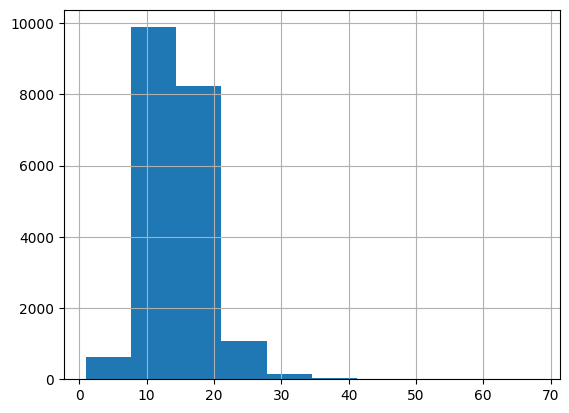

In [6]:
# 키워드 갯수 측정
from konlpy.tag import Kkma
import pandas as pd

def extract_keywords(title):
    kkma = Kkma()
    words = kkma.morphs(title)  # 형태소 분석
    words = [word for word in words if word not in ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']]  # 불용어 제거
    return words

df['keyword_count'] = df['제목'].apply(lambda title: len(extract_keywords(title)))

print(df.head())

# 키워드 갯수 평균
print(df['keyword_count'].mean())

# 키워드 갯수 최대값
print(df['keyword_count'].max())

# 키워드 갯수 최소값
print(df['keyword_count'].min())

# 키워드 갯수 히스토그램 그리기
df['keyword_count'].hist(bins=10)
plt.show()

# 키워드 갯수 상위 10개 뉴스 출력
print(df.sort_values('keyword_count', ascending=False)['제목'].head(10))


In [11]:
# 키워드 갯수 측정
from konlpy.tag import Okt
import pandas as pd

datas=" ".join(df['제목'])

okt=Okt()

result=okt.nouns(datas)
result

['현대',
 '제철',
 '순천',
 '공장',
 '초',
 '중',
 '고학년',
 '다문화',
 '가정',
 '자녀',
 '교재',
 '구입',
 '비',
 '지원',
 '의왕시',
 '일자리',
 '센터',
 '소형',
 '지게차',
 '면허',
 '취득',
 '과정',
 '교육',
 '생',
 '모집',
 '하남시',
 '도심',
 '어린이',
 '놀이터',
 '전면',
 '리',
 '모델링',
 '맞춤',
 '놀이터',
 '부천시',
 '청소년',
 '문화',
 '예술',
 '향유',
 '기회',
 '확대',
 '창의력',
 '감수성',
 '횡성군',
 '원봉',
 '센터',
 '개',
 '읍',
 '면',
 '소득',
 '층',
 '노후',
 '보일러',
 '교체',
 '사업',
 '완료',
 '대구시',
 '선관위',
 '도전',
 '선거',
 '골든벨',
 '개최',
 '싸이',
 '원주시',
 '먹거리',
 '축제',
 '지역',
 '경제',
 '라면',
 '페스',
 '타',
 '개최',
 '희망',
 '나눔',
 '인상',
 '유튜브',
 '채널',
 '하이',
 '머스타드',
 '선정',
 '롯데',
 '건설',
 '안전',
 '혁신',
 '부문',
 '신설',
 '중대',
 '재해',
 '근절',
 '하나은행',
 '폐업',
 '소상',
 '공인',
 '재기',
 '지원',
 '사업',
 '식품',
 '진흥',
 '푸드',
 '테크',
 '구지원',
 '센터',
 '식물성',
 '대체',
 '식품',
 '생태계',
 '조성',
 '본격',
 '카드',
 '용액',
 '늘',
 '월',
 '환급',
 '닉',
 '렉',
 '트릭',
 '포스코',
 '퓨처',
 '엠',
 '재',
 '포트폴리오',
 '완성',
 '지니',
 '베베',
 '핀',
 '동물',
 '세계',
 '공개',
 '인터내셔널',
 '해외',
 '광산',
 '환경',
 '복구',
 '인증',
 '관세',
 '인상',
 '후',
 '미국',
 '중소기업',
 '파산',


In [12]:
result_dict = {}
for element in result:
    if element in result_dict:
        result_dict[element] += 1
    else:
        result_dict[element] = 1


In [13]:
result_dict

{'현대': 149,
 '제철': 18,
 '순천': 34,
 '공장': 77,
 '초': 82,
 '중': 248,
 '고학년': 2,
 '다문화': 42,
 '가정': 33,
 '자녀': 33,
 '교재': 10,
 '구입': 9,
 '비': 234,
 '지원': 787,
 '의왕시': 18,
 '일자리': 70,
 '센터': 343,
 '소형': 7,
 '지게차': 3,
 '면허': 8,
 '취득': 44,
 '과정': 40,
 '교육': 361,
 '생': 64,
 '모집': 215,
 '하남시': 12,
 '도심': 44,
 '어린이': 50,
 '놀이터': 15,
 '전면': 29,
 '리': 39,
 '모델링': 3,
 '맞춤': 124,
 '부천시': 15,
 '청소년': 145,
 '문화': 276,
 '예술': 71,
 '향유': 5,
 '기회': 58,
 '확대': 242,
 '창의력': 2,
 '감수성': 3,
 '횡성군': 11,
 '원봉': 3,
 '개': 252,
 '읍': 12,
 '면': 22,
 '소득': 33,
 '층': 52,
 '노후': 44,
 '보일러': 12,
 '교체': 36,
 '사업': 600,
 '완료': 55,
 '대구시': 49,
 '선관위': 10,
 '도전': 104,
 '선거': 17,
 '골든벨': 2,
 '개최': 702,
 '싸이': 45,
 '원주시': 23,
 '먹거리': 22,
 '축제': 145,
 '지역': 466,
 '경제': 195,
 '라면': 18,
 '페스': 35,
 '타': 172,
 '희망': 51,
 '나눔': 104,
 '인상': 38,
 '유튜브': 14,
 '채널': 19,
 '하이': 20,
 '머스타드': 6,
 '선정': 212,
 '롯데': 156,
 '건설': 199,
 '안전': 348,
 '혁신': 238,
 '부문': 51,
 '신설': 81,
 '중대': 59,
 '재해': 85,
 '근절': 22,
 '하나은행': 27,
 '폐업': 37,
 '소상

In [17]:
# 한글자인 녀석 삭제
result_dict = {k: v for k, v in result_dict.items() if len(k) > 1}
result_dict

{'현대': 149,
 '제철': 18,
 '순천': 34,
 '공장': 77,
 '고학년': 2,
 '다문화': 42,
 '가정': 33,
 '자녀': 33,
 '교재': 10,
 '구입': 9,
 '지원': 787,
 '의왕시': 18,
 '일자리': 70,
 '센터': 343,
 '소형': 7,
 '지게차': 3,
 '면허': 8,
 '취득': 44,
 '과정': 40,
 '교육': 361,
 '모집': 215,
 '하남시': 12,
 '도심': 44,
 '어린이': 50,
 '놀이터': 15,
 '전면': 29,
 '모델링': 3,
 '맞춤': 124,
 '부천시': 15,
 '청소년': 145,
 '문화': 276,
 '예술': 71,
 '향유': 5,
 '기회': 58,
 '확대': 242,
 '창의력': 2,
 '감수성': 3,
 '횡성군': 11,
 '원봉': 3,
 '소득': 33,
 '노후': 44,
 '보일러': 12,
 '교체': 36,
 '사업': 600,
 '완료': 55,
 '대구시': 49,
 '선관위': 10,
 '도전': 104,
 '선거': 17,
 '골든벨': 2,
 '개최': 702,
 '싸이': 45,
 '원주시': 23,
 '먹거리': 22,
 '축제': 145,
 '지역': 466,
 '경제': 195,
 '라면': 18,
 '페스': 35,
 '희망': 51,
 '나눔': 104,
 '인상': 38,
 '유튜브': 14,
 '채널': 19,
 '하이': 20,
 '머스타드': 6,
 '선정': 212,
 '롯데': 156,
 '건설': 199,
 '안전': 348,
 '혁신': 238,
 '부문': 51,
 '신설': 81,
 '중대': 59,
 '재해': 85,
 '근절': 22,
 '하나은행': 27,
 '폐업': 37,
 '소상': 92,
 '공인': 94,
 '재기': 9,
 '식품': 61,
 '진흥': 109,
 '푸드': 72,
 '테크': 52,
 '구지원': 2,
 '식물성': 3,
 '대체': 29

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

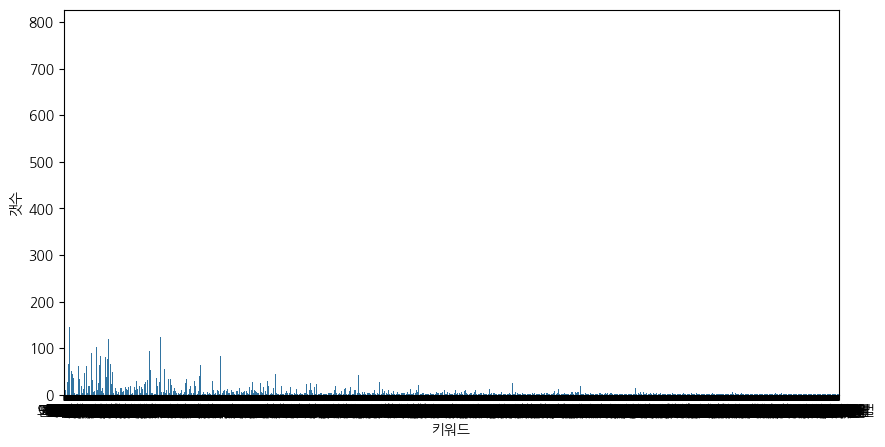

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=result_dict.keys(), y=result_dict.values())
plt.xlabel('키워드')
plt.ylabel('갯수')
plt.show()


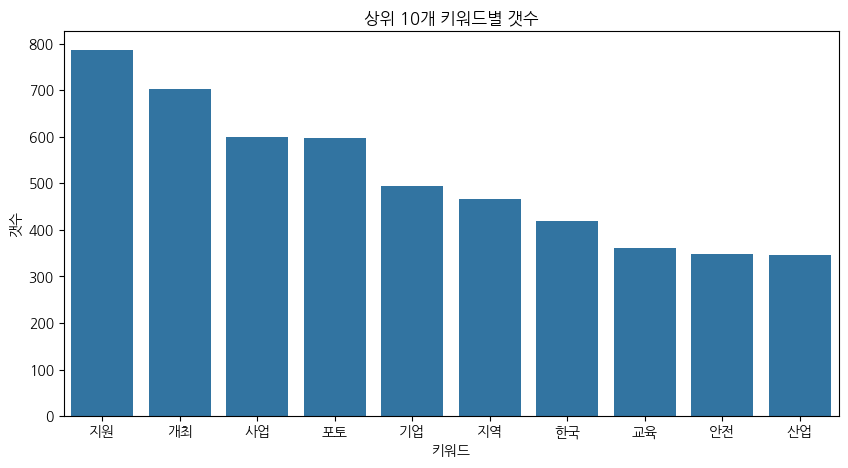

In [32]:
# 상위 10개만 뽑아서 그래프를 그려줌
top_10_keywords = sorted(result_dict.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_keywords = [(keyword, count) for keyword, count in top_10_keywords]

plt.figure(figsize=(10, 5))
sns.barplot(x=[keyword for keyword, count in top_10_keywords], y=[count for keyword, count in top_10_keywords])
plt.xlabel('키워드')
plt.ylabel('갯수')
plt.title('상위 10개 키워드별 갯수')

plt.savefig('barchart.png')


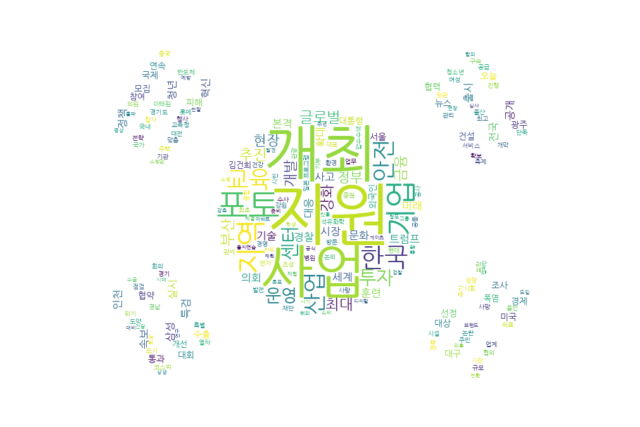

In [34]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(
    # font_path='C:/Windows/Fonts/malgun.ttf',
    font_path='/usr/share/fonts/NanumGothic.ttf',
    width=800, 
    height=800, 
    background_color='white',
    mask= np.array(Image.open('image.png'))
)

wordcloud.generate_from_frequencies(result_dict)

# 생성된 워드클라우드 이미지 표시
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 워드클라우드 이미지 저장
wordcloud.to_file("wordcloud.png")
